In [10]:
import pandas as pd

accident_df = pd.read_csv('../../FARS2020NationalCSV/accident.csv', encoding = 'ISO-8859-1')
vehicle_df = pd.read_csv('../../FARS2020NationalCSV/vehicle.csv', encoding = 'ISO-8859-1')




/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_1599/3702391140.py:4: DtypeWarning: Columns (56,58,176,178) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv('../../FARS2020NationalCSV/vehicle.csv', encoding = 'ISO-8859-1')


In [3]:
accident_df = accident_df[['WEATHER', 'ST_CASE','STATE', 'LGT_COND', 'FATALS']]
vehicle_df = vehicle_df[['ST_CASE','DR_DRINK', 'DR_ZIP', 'HIT_RUN', 'L_STATE', 'MAKENAME', 'MAK_MODNAME', 'MOD_YEAR', 'VSURCOND', 'VPICMAKENAME', 'VPICMODELNAME']]


In [4]:
merge_df = pd.merge(accident_df, vehicle_df, on = "ST_CASE", how = 'inner')
merge_df = merge_df[(merge_df['WEATHER'] <= 90) & (merge_df['VSURCOND'] <= 90) & (merge_df['MOD_YEAR'] <= 3000)]


In [5]:
output_file_path = 'Data/clustering_data.csv'
merge_df.to_csv(output_file_path)
output_file_path

'Data/clustering_data.csv'

## Elbow Method

/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


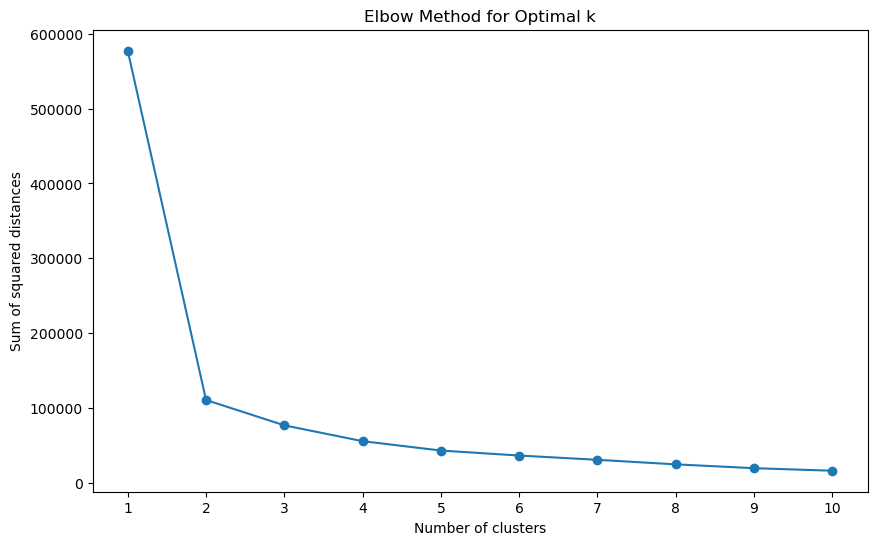

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Preparing data for K-means clustering
# Selecting only numerical features relevant for environmental analysis
kmeans_data = merge_df[['WEATHER', 'LGT_COND', 'VSURCOND']]

# Using the Elbow Method to find the optimal number of clusters
sse = []  # Sum of squared distances
for k in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(kmeans_data)
    sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range(1, 11))
plt.show()


Here we define the number of k is 4

## Silhouette

/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.8309870559164231


/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.6233315920118019


/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.6441922256874982


/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.6628101906529784


/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.6846456347051649


/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.746251051575895


/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.7242918837192516


/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is : 0.8069782666170565


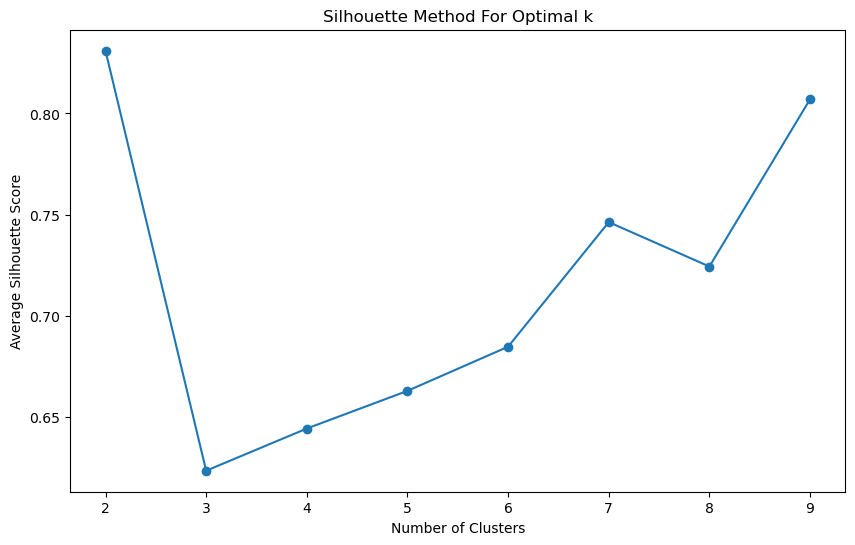

In [15]:
from sklearn.metrics import silhouette_score

# Assuming 'features' is your data prepared for clustering
features = merge_df[['WEATHER', 'LGT_COND', 'VSURCOND']]

silhouette_scores = []
range_n_clusters = list(range(2, 10))  # Example range from 2 to 9 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()


# Using Elbow method's number of Clusters

/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
Weather Conditions: 1
Light Conditions: 2
Road Surface Conditions: 1
Average Fatalities: 1.1119729514717582

Cluster 1:
Weather Conditions: 10
Light Conditions: 1
Road Surface Conditions: 1
Average Fatalities: 1.1183926256661385

Cluster 2:
Weather Conditions: 1
Light Conditions: 1
Road Surface Conditions: 11
Average Fatalities: 1.0822281167108754

Cluster 3:
Weather Conditions: 1
Light Conditions: 1
Road Surface Conditions: 1
Average Fatalities: 1.1062651436483213

Cluster 4:
Weather Conditions: 5
Light Conditions: 2
Road Surface Conditions: 1
Average Fatalities: 1.1527647610121836



/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


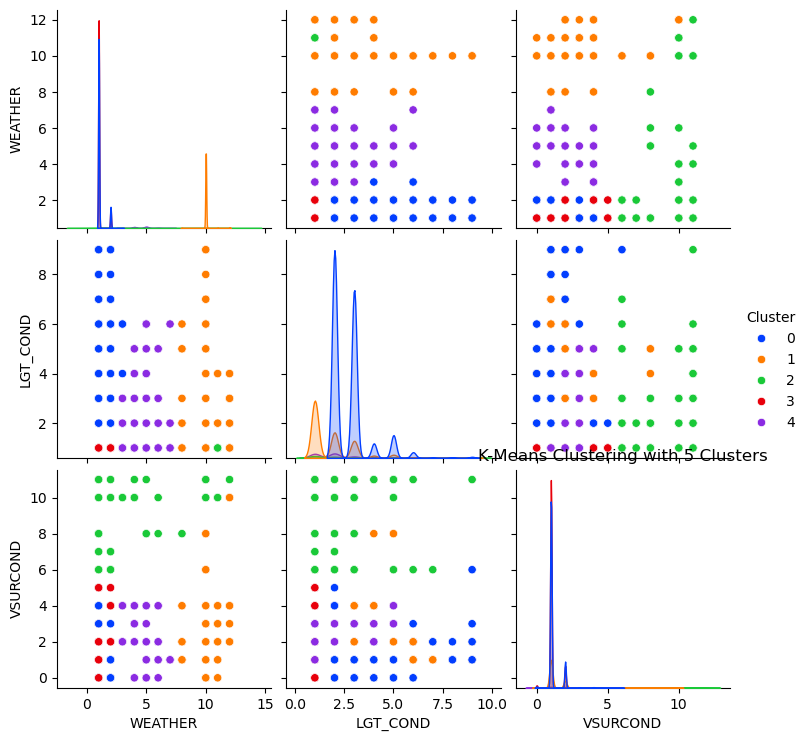

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


features = merge_df[['WEATHER', 'LGT_COND', 'VSURCOND']]

# Applying K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(features)

# Adding the cluster information to the original dataframe
merge_df['Cluster'] = clusters

# Analyzing the clusters
for i in range(5):  # Looping through 5 clusters
    cluster = merge_df[merge_df['Cluster'] == i]
    print(f"Cluster {i}:")
    print(f"Weather Conditions: {cluster['WEATHER'].mode()[0]}")
    print(f"Light Conditions: {cluster['LGT_COND'].mode()[0]}")
    print(f"Road Surface Conditions: {cluster['VSURCOND'].mode()[0]}")
    print(f"Average Fatalities: {cluster['FATALS'].mean()}")
    print()

# Visualizing the clusters
sns.pairplot(merge_df, vars=['WEATHER', 'LGT_COND', 'VSURCOND'], hue='Cluster', palette='bright')
plt.title('K-Means Clustering with 5 Clusters')
plt.show()


Here, numbers in each features represent differnt conditions.

### Weather
1. Clear
2. Rain
3. Sleet or Hail
4. Snow
5. Fog, Smog, Smoke
6. Severe Crosswinds
7. Blowing Sand, Soil, Dirt
8. Other
9. N/A
10. Cloudy
11. Blowing Snow
12. Freezing Rain or Drizzle

### light condition: 
1. Daylight
2. Dark - Not Lighted
3. Dark - Lighted
4. Dawn
5. Dusk
6. Dark - Unknown Lighting
7. Other
8. Not Reported
9. Reported as Unknown

### Road Surface Condition
0. Non - Trafficway or Driveway Access
1. Dry
2. Wet
3. Snow
4. Ice/Forst
5. Sand
6. Water(Standing or Moving)
7. Oil
8. Other
9. Slush
10. Mud, Dirt or Gravel

## Results of K-Means Clustering

Clusters Analysis:
The clusters appear to be differentiated mostly along the 'WEATHER' and 'VSURCOND' axes. This suggests that weather conditions and road surface conditions play significant roles in differentiating between clusters.
The histograms on the diagonal show the distribution of each feature within each cluster. For instance, one of the clusters (in red) seems to have a higher frequency of incidents occurring under a specific weather condition(1 and 2, that is clear or rain) whereas the light and road surface conditions are more spread out. This is because these are two most common weather condition happen on the road, whereas others are less likely to happen or in some states it won't ever happen. Also, we can see from the (0,0) plot that the number of accidents happened during clear and rain are much larger than accidents happened in other weather condition.



Relationships between Features:
In the scatter plots, you can see how the clusters are distributed with respect to two features at a time. For example, in the 'WEATHER' versus 'LGT_COND' scatter plot, you can see that some clusters are more prevalent under certain combinations of weather and light conditions. It looks like the blue, purple, and orange clusters are more scattered across conditions, indicating light condition might not have a strong impact on chance of fatal crashes, while the red and orange clusters also represent more specific conditions (Rain, Sleet or Hail, Blowing Snow or Freezing Rain, which will cause road surface condition getting worse and the chance of having a fatal crash increases dramatically).


## Using silhouette method's number of clusters

/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
Weather Conditions: 1
Light Conditions: 1
Road Surface Conditions: 1
Average Fatalities: 1.1034950613263865

Cluster 1:
Weather Conditions: 10
Light Conditions: 1
Road Surface Conditions: 1
Average Fatalities: 1.1183602771362586

Cluster 2:
Weather Conditions: 1
Light Conditions: 3
Road Surface Conditions: 1
Average Fatalities: 1.101240446059391

Cluster 3:
Weather Conditions: 1
Light Conditions: 1
Road Surface Conditions: 11
Average Fatalities: 1.1072961373390557

Cluster 4:
Weather Conditions: 2
Light Conditions: 1
Road Surface Conditions: 2
Average Fatalities: 1.1211817726589886

Cluster 5:
Weather Conditions: 1
Light Conditions: 5
Road Surface Conditions: 1
Average Fatalities: 1.0831615120274913

Cluster 6:
Weather Conditions: 1
Light Conditions: 2
Road Surface Conditions: 1
Average Fatalities: 1.1269583381687363

Cluster 7:
Weather Conditions: 5
Light Conditions: 2
Road Surface Conditions: 1
Average Fatalities: 1.1491228070175439

Cluster 8:
Weather Conditions: 10
Light

/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


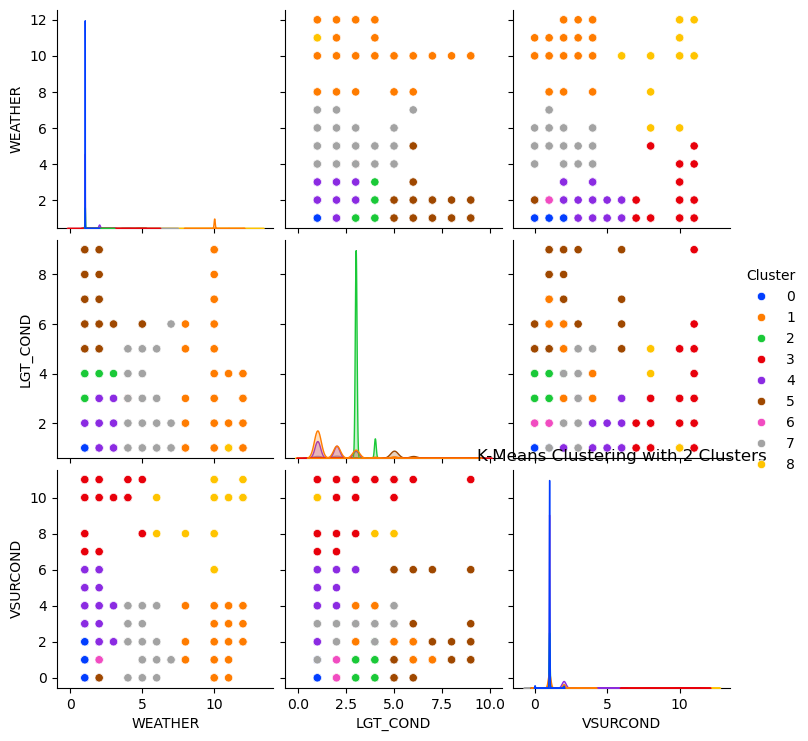

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Applying K-means clustering with 2 clusters generated by silhouette method
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(features)

# Adding the cluster information to the original dataframe
merge_df['Cluster'] = clusters

# Analyzing the clusters
for i in range(9):  # Looping through 2 clusters
    cluster = merge_df[merge_df['Cluster'] == i]
    print(f"Cluster {i}:")
    print(f"Weather Conditions: {cluster['WEATHER'].mode()[0]}")
    print(f"Light Conditions: {cluster['LGT_COND'].mode()[0]}")
    print(f"Road Surface Conditions: {cluster['VSURCOND'].mode()[0]}")
    print(f"Average Fatalities: {cluster['FATALS'].mean()}")
    print()

# Visualizing the clusters
sns.pairplot(merge_df, vars=['WEATHER', 'LGT_COND', 'VSURCOND'], hue='Cluster', palette='bright')
plt.title('K-Means Clustering with 2 Clusters')
plt.show()


The optimal number of clusters should be 2, but there was not much useful infomration we can get form that, so I used the second highest score, which is 9 clusters.

Based on the plot and the ouput result, we can infer that 
1. The highest risk of fatality seems to be associated with driving in the dark without proper lighting, especially in foggy conditions.
2. Weather that impacts visibility, like fog and heavy clouds, or adverse road conditions, such as blowing snow and non-standard surfaces, appears to increase the risk of fatal accidents.
3. Clusters with daylight, clear weather, and dry roads tend to have lower fatality rates, suggesting these are the safest conditions among the clusters analyzed.
4. Rainy conditions with wet roads also show an increased average in fatalities, indicating the hazardous nature of such conditions.

## DBSCAN

In [27]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

dbscan = DBSCAN(eps=0.5, min_samples=500)
clusters = dbscan.fit_predict(features_standardized)

# Add the cluster labels to your dataframe
merge_df['Cluster'] = clusters

# Check the number of points in each cluster
cluster_counts = merge_df['Cluster'].value_counts()
print(cluster_counts)

Cluster
 6     18038
 0      8572
 5      7097
-1      3615
 8      3046
 2      1972
 4      1282
 7      1190
 10      990
 1       919
 9       854
 3       589
 11      558
Name: count, dtype: int64


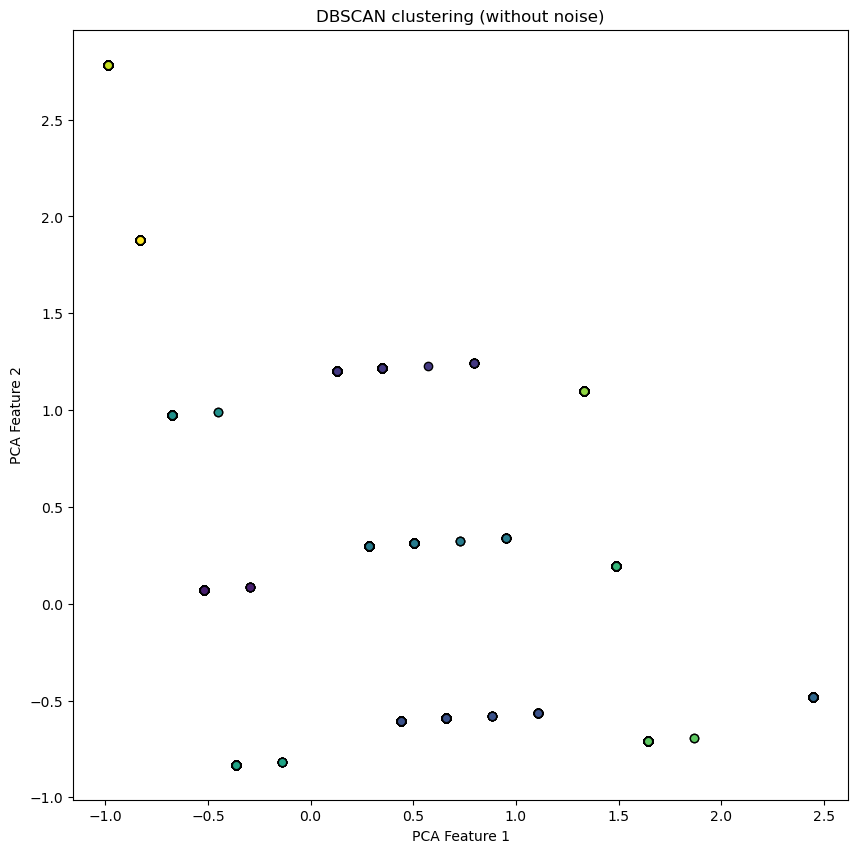

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the data to two dimensions using PCA for visualization purposes
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

# Create a scatter plot of the PCA-reduced data color-coded by cluster label
plt.figure(figsize=(10, 10))
unique_labels = np.unique(clusters)
# Generate a color map similar to plt.cm.Spectral but without black
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Skip noise points, they won't be plotted
        continue

    class_member_mask = (clusters == k)

    xy = features_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN clustering (without noise)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


This is a cluster result plotted without any noise points on. Clearly this plot cannot bring us any useful information, let's try another way to see what will happen.

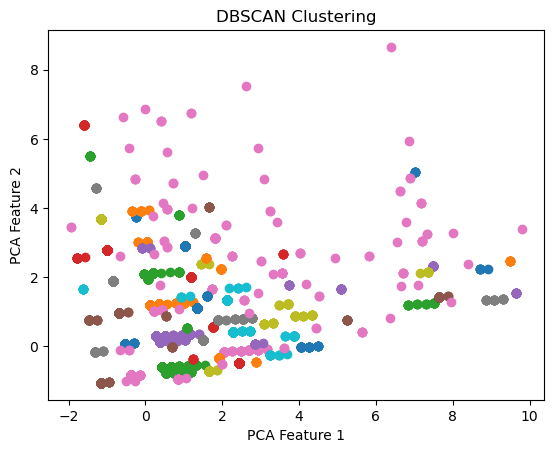

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the features before applying DBSCAN
scaler = StandardScaler()
features_scaled = scaler.fit_transform(merge_df[['WEATHER', 'LGT_COND', 'VSURCOND']])

# Apply DBSCAN to the standardized features
# Note: You'll need to tune these parameters
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
clusters = dbscan.fit_predict(features_scaled)

# Add cluster info to the original DataFrame
merge_df['Cluster'] = clusters

# Reduce dimensions for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Visualize the clusters
unique_labels = set(clusters)
for label in unique_labels:
    plt.scatter(features_pca[clusters == label, 0], features_pca[clusters == label, 1], label=label)

plt.title('DBSCAN Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()



The plot shows a variety of clusters, each represented by a different color. Some clusters appear more densely packed, while others are sparse. The densely packed clusters likely represent more common combinations of weather, light, and road surface conditions that frequently occur together, while sparser ones may represent less common or more unique conditions. This is not an ideal result for us to see, and probablt DBSCAN is not a good model for this dataset.

## Hierarchical Clustering

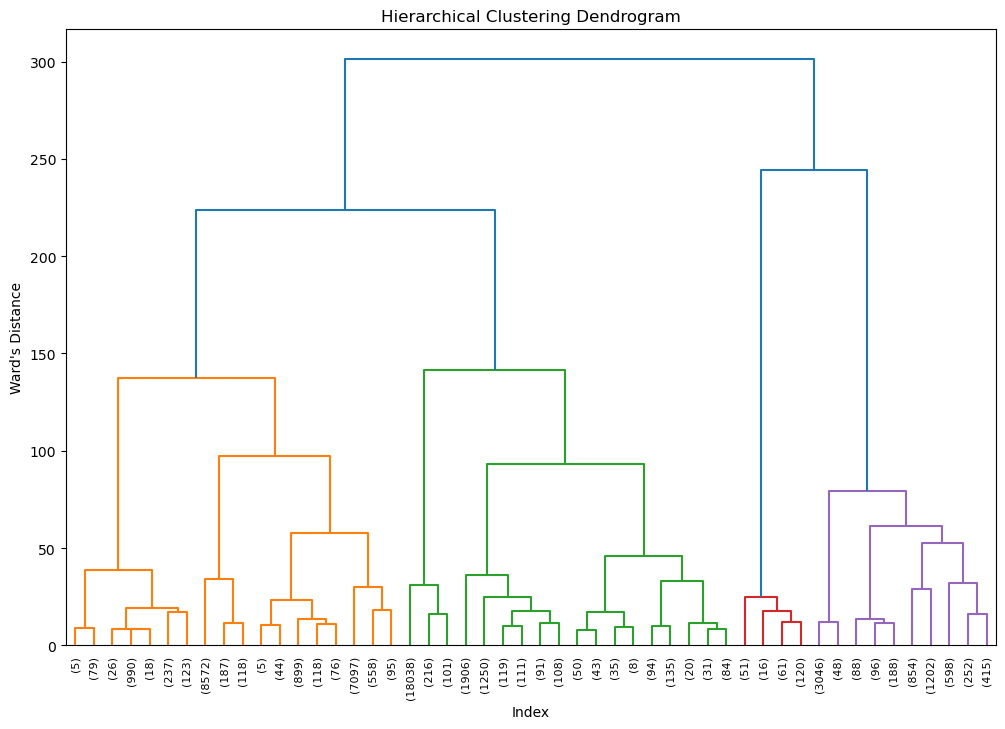

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


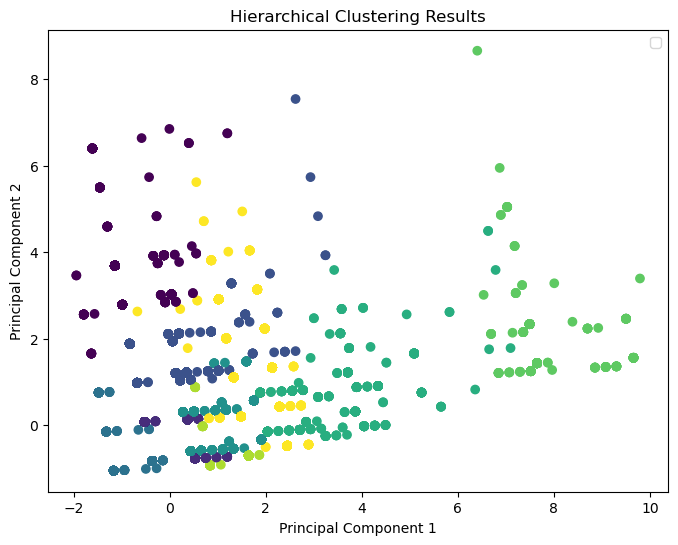

In [43]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import sys

sys.setrecursionlimit(10000)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(merge_df[['WEATHER', 'LGT_COND', 'VSURCOND']])

# Performing hierarchical clustering
Z = linkage(features_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=50, show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Ward\'s Distance')
plt.show()

# To cut the dendrogram and get the cluster labels, use the following:
from scipy.cluster.hierarchy import fcluster
k = 9  # for example, if we decide on 9 clusters
cluster_labels = fcluster(Z, k, criterion='maxclust')

# Adding the cluster information to the original dataframe
merge_df['Cluster'] = cluster_labels

# Optionally reduce dimensions for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=merge_df['Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The plot shows PCA has been used to reduce the dimensionality of the data to two principal components, which are linear combinations of the original variables. The proximity of points within the same cluster (same color) suggests they are similar to each other based on the original features (weather, light, and road surface conditions). 

Some clusters are more tightly grouped, suggesting that there are well-defined conditions under which a number of accidents commonly occur. Based on the size of count and the size of data, most of the likely combination could be clear weather, daylight, and dry road surface condition, which is the most environmental condition for an accident, also the most common one. Some other clusters that are sparse or have points spread out may indicate less common or more variable conditions. Probably these are some adverse weather conditions like fod or snow with dusk or dawn light condition, with some potential hazardous road surface condition that is rarely happen in real life. All of those needs to be confirmed by further analysis.

## Conclusion

Based on those plots generated by differnt methods, I will say that K-Means is the best method for this dataset. It has the most intuitive result, and bring the most information. DBSCAN, on the other hand, is not as competitive as K-means as it seperate the dataset into too many small clusters, which is likely to capture noise and random fluctuations, also, in some cases, Each data point might become its own cluster, which defeats the purpose of clustering to find broader patterns.

Hierarchical Clustering is also a good method for this dataset as it generated just fine number of clusters and the clusters make sense logically and intuitively based on the domain knowledge and also make sense in the real world


In conclusion, our analysis of vehicle accident data through various clustering methods has provided us with meaningful insights into the conditions under which accidents are most likely to occur. By examining the environmental factors—specifically, weather conditions, lighting, and road surface states—we have identified patterns that could have significant implications for public safety and policy.

#### Predominant Conditions for Accidents:

A notable number of accidents occur under clear weather, during daylight, and on dry roads. This finding is somewhat counterintuitive as these conditions are typically considered safe. It suggests that other factors, such as driver distraction or traffic volume, might play a more significant role than expected.

#### High-Risk Conditions:

Although less frequent, accidents occurring under rare and extreme conditions, like severe crosswinds or during weather phenomena like blowing sand, are especially concerning. These events, while not common, have a high impact and could benefit from targeted, situation-specific safety measures.

#### Overlap of Conditions:

The overlap between clusters in certain conditions, such as cloudy weather transitioning to rain, indicates that accidents under these conditions may not be distinctly more dangerous than others. This suggests that interventions should be balanced across a range of weather conditions rather than focusing on one in isolation

#### Potential for Targeted Interventions:

Understanding the commonalities within each cluster allows for the development of targeted interventions. For instance, enhancing street lighting and implementing anti-fog measures could mitigate the risk of accidents under specific conditions identified as higher risk.


In real-life terms, this analysis could help inform where and when to focus road safety resources to prevent accidents. It could lead to better-timed traffic advisories, more effective deployment of road maintenance crews, and smarter city planning regarding road design and lighting. On a personal level, it could help drivers be more aware of the conditions that are deceptively risky, like clear days, or truly dangerous, like foggy, poorly lit nights, potentially encouraging safer driving behaviors.

Ultimately, the goal of this analysis is to contribute to safer roads and to reduce the number and severity of traffic accidents, potentially saving lives and reducing injuries among road users.